# Applied Statistics Tasks

**Francesco Troja**

***

## Task 1: **Permutations and Combinations**

<figure style="text-align:center;">
    <img src="T1-fisher.png" alt="Lady Testing Tea" width="400"/>
    <figcaption>Photo credit<sup>1</sup> </figcaption>
</figure>

### Table of Contents
1. [Problem Statement](#problem_statement)
2. [Introduction to the problem](#2)
3. [Import Python libraries](#3)
4. [Understand the Problem](#4)
   -   [4.1 Permutations](#4_1)
   -   [4.2 combinations](#4_2)
5. [Visualize the experiment](#5)
6. [Hypothesis Testing](#6)
   - [Introduction to Null Hypothesis](#6-1)
7. [References](#references)

### 1. Problem Statement <a class="anchor" id="problem_statement"></a>
> Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.
>
>Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.
>
>Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error. 
>
>Would you accept two errors? Explain.

### 2. Introduction to the problem <a class="anchor" id="2"></a>


Before delving into problem resolution, it’s important to provide some context to better understand the origins of the experiment and why it was conducted. This background will help clarify how to approach the task at hand. The "**Lady Tasting Tea**" experiment is a essential example in the field of *statistics* and *hypothesis testing*, introduced by **Ronald A. Fisher** in the 1920s. The experiment was inspired by a claim made during a social gathering at Cambridge, where **Muriel Bristol**, a biologist, confidently stated that she could *distinguish* whether *milk or tea was poured first into a cup of tea*. Fisher, intrigued by her assertion, saw this as an opportunity to design a simple yet robust experiment to test her claim and demonstrate key principles of hypothesis testing **$^2$**.

Following Fisher's words in his book The Design of Experiments (1935, p. 13) **$^3$**:
> Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.

#### 3. Import Python libraries

To execute this task, several Python libraries have been utilized. These libraries were chosen for their specific functionalities and capabilities, tailored to the requirements of the project:

- `math`: It provides access to mathematical functions like trigonometry, logarithms, factorials, and other common math operations and it's essential for performing standard mathematical calculations **$^4$**.
- `itertools`: It offers functions for creating iterators for efficient looping. It includes tools for permutations, combinations, product, and other iterator algebra operations **$^5$**. 
- `random`: It is used to generate pseudo-random numbers for various distributions. It's commonly used for simulations, random sampling, and other tasks that require randomization, such as shuffling data or making random choices **$^6$**.
- `numpy`: It provides support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays **$^7$**.
- `matplotlib`: It is a widely used library for data visualization in Python. It provides a flexible and comprehensive set of tools to create various types of plots and charts. Its versatility allows to create bar charts, line plots, scatter plots, histograms, and more, making it an essential tool for exploratory data analysis and presentation of findings **$^8$**.
- `scipy`:  It includes an extensive array of statistical functionalities, covering various aspects of probability and data analysis. It includes a diverse set of probability distributions, facilitating the modeling of different random variables. Moreover, the module provides tools for generating summary and frequency statistics, allowing for a comprehensive understanding of dataset characteristics 

In [2]:
# adding the pytonn libraries
import math
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom

### 4. Understand the Problem

In this variation of the experiment, the task is to determine the probability that the participant correctly selects the **six cups** where *milk was poured first* (or tea, depending on the scenario), assuming random guessing without any special knowledge. This involves solving a combinatorial problem to calculate the chances of *selecting six correct cups out of twelve*. Referring again to The Design of Experiments, it is noteworthy that Fisher himself advocated for the use of **permutations** and **combinations**—*two essential concepts in combinatorics*, which is the branch of mathematics focused on counting and arrangement:

> [...] There are 70 ways of choosing a group pf 4 objects out of 8. This may be demonstrated by an argument familiar to students of "permutations and combinations," namely, that if we were to choose the 4 objects in succession we hould have successively 8, 7, 6, 5 objects to choose from, and could make our succession of choices in 8x7x6x5, or 1680 ways.

(Fisher, 1935. p.14)

By utilizing these combinatorial methods, the number of possible outcomes can be systematically analyzed, allowing for more precise experimental design and interpretation. In the following section, the concepts of **permutations** and **combinations** will be explored further to clarify their differences and their application in this type of problem **$^9$**.

In [3]:
# total number of cups
n = 12 
# number of cups with milk first (or tea first, depending from the scenario)
k= 6

#### 4.1 Permutations

**Permutations** in probability theory refer to the *various ways a set of items can be arranged in a specific order*. A *key characteristic* of permutations is that the **order of the items matters**. For instance, consider a four-digit PIN: each digit must occupy the correct position for the PIN to be valid. If we take the digits 1, 2, 3, and 4, the arrangement "1234" is distinct from "4321." Although both sequences use the same digits, they represent different outcomes because their order differs **$^{10}$**.

There are three main types of permutations:

- **Permutations of distinct items**: Where all items are unique **$^{10}$**.
- **Permutations with repetition**: Where some items may be repeated **$^{10}$**.
- **Circular permutations**: Where the arrangement is in a circle, changing how we calculate the order **$^{11}$**.

For the scope of this task, the study will focus on the first type of permutation: **permutations of distinct items**. 

The mathematical formula for calculating permutations is:

$$P(n, k) = \frac{n!}{(n - k)!}$$

where:
- $n$ = total number of items available to choose from
- $k$ = number of items to arrange
- $n!$ ($n$ factorial) = product of all positive integers up to $n$
- $P(n,k)$ = the number of ways to arrange $k$ items out of $n$
- $(n-k)!$ = factorial of the difference between the total items and the items chosen **$^{12}$**

  




#### 4.2 Combinations

Combinations, on the other hand, are used to determine how many ways a subset of items can be selected from a larger group, where the order of selection does not matter. For example, suppose you need to choose three letters—A, B, and C—from a set. The arrangements ACB, ABC, or BAC would all be considered the same combination since the order doesn't matter. Unlike permutations, where order is important, combinations focus solely on the selection of items, disregarding how they are arranged **$^{13}$**. 

The mathematical formula for calculating Combination is:

$$C(n, k) = \frac{n!}{k!(n - k)!}$$

where:
- $n$ = total number of items
- $k$ = the number of items to choose
- $C(n,k)$ = the number of ways to choose $k$ items out of $n$.

The main difference in the permutation and combination mathematical formula is that combinations include a division by $k!$ to account for the fact that the order of the selected items doesn't matter. In other words, combinations count only unique groupings, ignoring different arrangements of the same items. On the other hand, permutations do not include this division by $k!$, meaning every possible arrangement (or order) of the selected items is counted, making order important in permutations **$^{13}$**.

Now that we have a clear understanding of permutations and combinations, we can analyze the problem to determine which concept applies. As discussed earlier, the key distinction between permutations and combinations is that in permutations, the order matters, whereas in combinations, it does not. This distinction provides a helpful starting point for understanding the Lady Tasting Tea experiment. Since the task involves selecting a specific set of cups without regard to the order in which they are chosen, it is evident that we need to consider combinations, not permutations, to solve the problem effectively.

A straightforward way to calculate combinations in Python is by using the `math.comb(n, k)` function from the `math` package. This function takes two parameters: $n$, which represents the total number of items, and $k$, the number of items to be selected. It then returns the number of possible ways to choose k items from n items without considering the order of selection **$^{14}$**.

In [4]:
#using math.comb to calculate combinations
def calc_combinations(n, k):
    return math.comb(n, k)


print(f"The number of ways to choose 6 cups from 12 is: {calc_combinations(n, k)}")


The number of ways to choose 6 cups from 12 is: 924


To gain deeper insights into the workings of the math.comb(n, k) function, we can employ an alternative approach. This method will also help verify the accuracy of the results obtained from the previous function. First, let’s consider the total number of ways to select six cups from twelve, taking into account the order of selection. This is represented by calculating $12!$ (12 factorial). A factorial is a mathematical function that multiplies a given number $𝑛$ by every positive integer that precedes it. In simpler terms, the factorial of a number is the product of all whole numbers from that number down to one. The formula is expressed as **$^{15}$**:
​
$$n!=n×(n−1)×(n−2)×⋯×1$$

Next, we need to account for the number of ways to arrange the six selected cups. Once we have this information, we can apply the combination formula to calculate the number of ways to choose six cups from twelve without regard to order. The combination formula is given by:

$$C(12, 6) = \frac{12!}{6!(12 - 6)!}$$

​This formula allows us to find the number of unique combinations of six cups selected from a total of twelve, ensuring we are considering all possible selections accurately.


In [5]:
ways_ordered = 12*11*10*9*8*7
no_shuffles = 6 * 5 *4 *3 *2 *1
no_combs = ways_ordered // no_shuffles

print(f"Total number of ordered selections: {ways_ordered}")
print(f"Number of ways to arrange 6 selected cups: {no_shuffles}")
print(f"The total number of combinations of selecting 6 cups from 12 is: {no_combs}")

Total number of ordered selections: 665280
Number of ways to arrange 6 selected cups: 720
The total number of combinations of selecting 6 cups from 12 is: 924


### 5. Visualize the experiment <a class="anchor" id="5"></a>

Now that we have analyzed the data and determined that the total number of combinations for selecting 6 cups from 12 is 924, we can move on to the next part of the task. In this step, we will attempt to visualize the number of ways the lady can select between 1 and 6 correct cups in a random order. This part of the Lady Tasting Tea experiment is important because it allows us to calculate the probability distribution for different outcomes. By understanding how the probability of success changes with each possible number of correct selections, we can better evaluate the chance of the lady's success being due to pure chance.

Furthermore, this visualization plays a vital role in the discussion of the null hypothesis, which will be elaborated upon in the final section of the task.

Let's begin by generating a list that represents the total number of cups using the range function. By default, range starts from 0, but in this scenario, we want to avoid having a case where there are 0 cups. To adjust for this, we can modify the range to start from 1 instead of 0. The line generates a list of unique labels for each cup. Since there are 12 cups, the function will generate a sequence of integers from 1 to 12.

In [6]:
labels = list(range(1, n+1))
print(f"The Total number of cups is: {labels}")

The Total number of cups is: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


Now that we have a list containing the total number of cups, we can generate all possible combinations of selecting 6 cups where the milk is added first (or vice versa). To do this, we use the `itertools.combinations(iterable, r)` function. This function is ideal because it generates all unique combinations of a specified length from an input iterable, ensuring no repetition and returning them in lexicographic order. The `itertools.combinations()` function takes two main arguments:

- `iterable`: The input sequence (e.g., a list of cups) from which the combinations are generated.
- `r`: The number of items in each combination (in this case, 6 cups)**$^{16}$**.

**Note**: This function returns an iterator that generates the combinations on demand, rather than precomputing and storing them all at once. For the purposes of this task, however, the result will be stored in a list, making it easy to access all combinations at once in a straightforward manner **$^{17}$**.

In [7]:
combs = list(itertools.combinations(labels, k))
print(f"Generated {len(combs)} combinations of {k} elements from the total set of cups:\n ")
for comb in combs:
    print(comb)

Generated 924 combinations of 6 elements from the total set of cups:
 
(1, 2, 3, 4, 5, 6)
(1, 2, 3, 4, 5, 7)
(1, 2, 3, 4, 5, 8)
(1, 2, 3, 4, 5, 9)
(1, 2, 3, 4, 5, 10)
(1, 2, 3, 4, 5, 11)
(1, 2, 3, 4, 5, 12)
(1, 2, 3, 4, 6, 7)
(1, 2, 3, 4, 6, 8)
(1, 2, 3, 4, 6, 9)
(1, 2, 3, 4, 6, 10)
(1, 2, 3, 4, 6, 11)
(1, 2, 3, 4, 6, 12)
(1, 2, 3, 4, 7, 8)
(1, 2, 3, 4, 7, 9)
(1, 2, 3, 4, 7, 10)
(1, 2, 3, 4, 7, 11)
(1, 2, 3, 4, 7, 12)
(1, 2, 3, 4, 8, 9)
(1, 2, 3, 4, 8, 10)
(1, 2, 3, 4, 8, 11)
(1, 2, 3, 4, 8, 12)
(1, 2, 3, 4, 9, 10)
(1, 2, 3, 4, 9, 11)
(1, 2, 3, 4, 9, 12)
(1, 2, 3, 4, 10, 11)
(1, 2, 3, 4, 10, 12)
(1, 2, 3, 4, 11, 12)
(1, 2, 3, 5, 6, 7)
(1, 2, 3, 5, 6, 8)
(1, 2, 3, 5, 6, 9)
(1, 2, 3, 5, 6, 10)
(1, 2, 3, 5, 6, 11)
(1, 2, 3, 5, 6, 12)
(1, 2, 3, 5, 7, 8)
(1, 2, 3, 5, 7, 9)
(1, 2, 3, 5, 7, 10)
(1, 2, 3, 5, 7, 11)
(1, 2, 3, 5, 7, 12)
(1, 2, 3, 5, 8, 9)
(1, 2, 3, 5, 8, 10)
(1, 2, 3, 5, 8, 11)
(1, 2, 3, 5, 8, 12)
(1, 2, 3, 5, 9, 10)
(1, 2, 3, 5, 9, 11)
(1, 2, 3, 5, 9, 12)
(1, 2, 3, 5, 10, 11)
(

Now that we have a list containing all possible combinations of selecting 6 cups, we can move forward by focusing on the actual selection of cups for the experiment. To do this, we will randomly select 6 cups where milks is added first from a total of 12 using simple random sampling. This step mirrors how, in the real-world experiment, the cups would be chosen without bias. We implement this randomness using `random.sample(labels, k)`, which ensures that each cup has an equal probability of being chosen. This technique is crucial because it maintains the integrity of the experiment by guaranteeing that no prior assumptions or patterns influence the selection of cups. This random selection will be also the key to evaluating the null hypothesis in the later part of the task **$^{18}$** **$^{19}$**.  

In [8]:
cups_milk_first = random.sample(labels, 6)
print("The randomly selected cups containing milk added first are:\n", cups_milk_first)

The randomly selected cups containing milk added first are:
 [8, 7, 2, 5, 9, 6]


We previously generated 924 combinations and now, with the randomly selected sample of cups, we will calculate the overlap between these two sets. This calculation is crucial for evaluating the accuracy of the lady’s guesses by directly comparing the cups she selected to those that are confirmed to have milk added first. By determining the number of selections that align with the correct combinations, we can gain valuable insights into her guessing performance. Understanding this overlap is not only important for assessing her accuracy but also for evaluating the statistical significance of her ability to distinguish between the cups. If the number of correct selections significantly exceeds what would be expected by random chance, we can start to gather evidence supporting her claim of possessing a special skill. Additionally, this analysis will help us identify whether her guessing pattern shows any systematic bias or if it is merely a result of random selection  **$^{20}$**.

In [9]:
# Calculate the overlap between each element of combs and labels_milk.
no_overlaps = []

for comb in combs:
  overlap = set(comb).intersection(set(cups_milk_first))
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(1, 2, 3, 4, 5, 6) {2, 5, 6} 3
(1, 2, 3, 4, 5, 7) {2, 5, 7} 3
(1, 2, 3, 4, 5, 8) {8, 2, 5} 3
(1, 2, 3, 4, 5, 9) {9, 2, 5} 3
(1, 2, 3, 4, 5, 10) {2, 5} 2
(1, 2, 3, 4, 5, 11) {2, 5} 2
(1, 2, 3, 4, 5, 12) {2, 5} 2
(1, 2, 3, 4, 6, 7) {2, 6, 7} 3
(1, 2, 3, 4, 6, 8) {8, 2, 6} 3
(1, 2, 3, 4, 6, 9) {9, 2, 6} 3
(1, 2, 3, 4, 6, 10) {2, 6} 2
(1, 2, 3, 4, 6, 11) {2, 6} 2
(1, 2, 3, 4, 6, 12) {2, 6} 2
(1, 2, 3, 4, 7, 8) {8, 2, 7} 3
(1, 2, 3, 4, 7, 9) {9, 2, 7} 3
(1, 2, 3, 4, 7, 10) {2, 7} 2
(1, 2, 3, 4, 7, 11) {2, 7} 2
(1, 2, 3, 4, 7, 12) {2, 7} 2
(1, 2, 3, 4, 8, 9) {8, 9, 2} 3
(1, 2, 3, 4, 8, 10) {8, 2} 2
(1, 2, 3, 4, 8, 11) {8, 2} 2
(1, 2, 3, 4, 8, 12) {8, 2} 2
(1, 2, 3, 4, 9, 10) {9, 2} 2
(1, 2, 3, 4, 9, 11) {9, 2} 2
(1, 2, 3, 4, 9, 12) {9, 2} 2
(1, 2, 3, 4, 10, 11) {2} 1
(1, 2, 3, 4, 10, 12) {2} 1
(1, 2, 3, 4, 11, 12) {2} 1
(1, 2, 3, 5, 6, 7) {2, 5, 6, 7} 4
(1, 2, 3, 5, 6, 8) {8, 2, 5, 6} 4
(1, 2, 3, 5, 6, 9) {9, 2, 5, 6} 4
(1, 2, 3, 5, 6, 10) {2, 5, 6} 3
(1, 2, 3, 5, 6, 11) {2, 5, 6} 3
(1, 2, 3

With the overlaps identified, the next step is to determine the frequency of each overlap level. By using counts = np.unique(no_overlaps, return_counts=True), we effectively summarize how many of the 924 possible combinations result in 0, 1, 2, ..., or 6 correct selections. This provides a clear distribution of correct guesses, which is essential for interpreting the outcome **$^{21}$**. 

In [10]:
counts = np.unique(no_overlaps, return_counts=True)
overlap_levels, frequencies = counts

print("Overlap Levels and Their Frequencies:")
for level, freq in zip(overlap_levels, frequencies):
    print(f"Overlap Level {level}: {freq} occurrences")

Overlap Levels and Their Frequencies:
Overlap Level 0: 1 occurrences
Overlap Level 1: 36 occurrences
Overlap Level 2: 225 occurrences
Overlap Level 3: 400 occurrences
Overlap Level 4: 225 occurrences
Overlap Level 5: 36 occurrences
Overlap Level 6: 1 occurrences


let's now visualize the results:

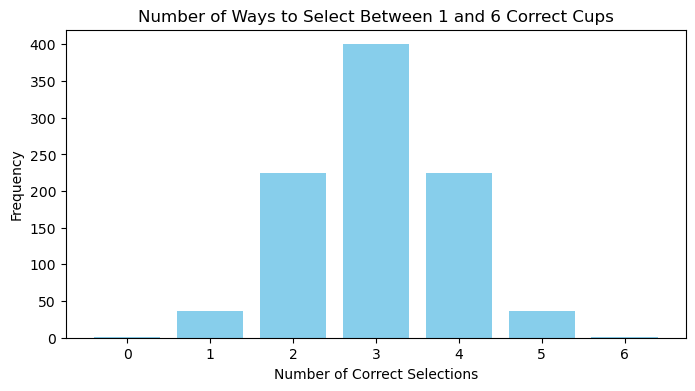

In [11]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(counts[0], counts[1], color='skyblue')
ax.set_xlabel('Number of Correct Selections')
ax.set_ylabel('Frequency')
ax.set_title('Number of Ways to Select Between 1 and 6 Correct Cups')
plt.show()

### 6. Hypothesis Testing <a class="anchor" id="6"></a>

The second part of this task will explore advanced statistical concepts, concentrating on hypothesis testing to evaluate if an individual can genuinely identify the order in which milk or tea was poured into a cup first. Hypothesis testing is a powerful tool that allows researchers and data analysts to make evidence-based conclusions. This section will begin by introducing the Null Hypothesis, a fundamental component in hypothesis testing, which serves as a baseline assumption and is pivotal for interpreting test results **$^{22}$**. 

### 6.1 Introduction to Null Hypothesis <a class="anchor" id="6-1"></a>

Hypothesis testing is a statistical process used to evaluate two opposing hypotheses to draw conclusions from experimental data: 

-  **The null hypothesis**, denoted by *$H_0$*, represents the assumption that there is no specific effect, difference, or relationship present in the context of the experiment. It posits that any observed variations in the data are likely due to random chance rather than a true effect. 
-  **The alternative hypothesis**, denoted by *$H_1$*, proposes that a significant effect, difference, or relationship does exist, which contrasts the null hypothesis.
  
At the conclusion of a hypothesis test, researchers arrive at one of two potential decisions:

- **Insufficient Evidence to Reject the Null Hypothesis**: ndicates that observed differences are likely due to sampling errors.
- **Sufficient Evidence to Reject the Null Hypothesis**: The results are statistically significant, indicating strong evidence against the null hypothesis.

It is important to understand that failing to reject the null hypothesis does not imply that the null hypothesis is definitively true. Instead, it indicates that the evidence collected is insufficient to support the alternative hypothesis. This distinction underscores the probabilistic nature of hypothesis testing, where conclusions are drawn based on the strength of evidence rather than certainties **$^{23}$**.

*The concept of the null hypothesis* was first introduced by **Ronald Fisher** in the early 20th century. Fisher's major work, **Statistical Methods for Research Workers**, first published in 1925, laid the foundation for significance tests. In this book, Fisher emphasized the importance of hypothesis testing in scientific research, advocating for a systematic approach to inferential statistics that allows researchers to draw conclusions based on experimental data. **$^{24}$**

In his later work, **The Design of Experiments**, Ronald A. Fisher *elaborated on the concept of the null hypothesis*, particularly through the lens of the Lady Tasting Tea experiment. He proposed that:

> Our examination [...] has therefore led us to a statistical test of significance, by which these results are divided into two classes with opposed interpretations. [...] The two classes of results which are distinguished by our test of significance are, on the one hand, those which show a significant discrepancy from a certain hypothesis; namely, in this case, the hypothesis that the judgments given are in no way influenced by the order in which the ingredients have been added; and on the other hand, results which show no significant discrepancy from this hypothesis. [...] In relation to any experiment, we may speak of this hypothesis as the 'null hypothesis.' It should be noted that the null hypothesis is never proved or established, but is possibly disproved in the course of experimentation. Every experiment may be said to exist only to give the facts a chance of disproving the null hypothesis. (Fisher, pp. 18-19).

In the context of the Lady Tasting Tea experiment, the null and alternative hypotheses can be expressed as follows:

- **$H_0$**: The lady is guessing; her ability to correctly identify the order of milk and tea is due to random chance. 
- **$H_1$**: The lady has a special ability to distinguish the order in which the milk and tea were added.

With the Null Hypothesis formulated, the next step is to conduct the experiment to determine whether we can reject the null hypothesis. Statistical tests are essential tools for this purpose, as they assess whether the sample data provides enough evidence to reject or fail to reject the null hypothesis. A test statistic is calculated from the sample data, which quantifies how closely the data aligns with the null hypothesis. If the sample data supports the null hypothesis, we do not reject it; otherwise, we may reject it in favor of an alternative hypothesis. Choosing the appropriate statistical test depends on several factors, including the distribution of the sample data (e.g., whether it follows a normal distribution), sample size, whether the variance is known, and the type of data being analyzed **$^{25}$**. 

Statistical tests are generally categorized into two types: 

- **one-tailed test**: It looks for evidence in only one direction, testing if something is either greater than or less than a certain value.
- **two-tailed test**: It looks for evidence in both directions, checking if something is different from a value in either direction, whether higher or lower **$^{26}$**. 

In our analysis, we specifically apply these concepts to the Lady Tasting Tea experiment. Our primary interest lies in determining whether the lady possesses a genuine skill, meaning her performance exceeds what would be expected from random guessing. Thus, a one-tailed test is more suitable, as we are specifically testing for the likelihood that she performs better than chance, rather than simply differing from chance in either direction. As expressed by Fisher, it is common for researchers to adopt a 5% significance level (also called $\alpha$) when conducting hypothesis tests. This threshold serves as a criterion for statistical significance and allows experimenters to disregard results that do not meet this benchmark. Fisher noted:

>"It is usual and convenient for experimenters to take 5 per cent. as a standard level of significance, in the sense that they are prepared to ignore all results which fail to reach this standard, and, by this means, to eliminate from further discussion the greater part of the fluctuations which chance causes have introduced into their experimental results."(Fisher, pp. 15-16)

By setting $\alpha$ at 0.05, we accept that there is a 5% chance of erroneously rejecting the null hypothesis when it is true. In the case of the Lady Tasting Tea experiment, if the calculated p-value from our statistical test is less than 0.05, we would reject the null hypothesis, suggesting that the lady's ability to distinguish between the cups is statistically significant and unlikely to have occurred due to random guessing. Conversely, if the p-value is greater than 0.05, we would fail to reject the null hypothesis, implying that her guesses could easily be attributed to chance, thus confirming the baseline assumption that she does not possess any special ability to tell the order of milk and tea **$^{27}$**.

Before proceeding with the Python test, it's important to address the question: What is the p-value? The p-value, short for "probability value," is a critical statistic used to evaluate the likelihood that the observed data could have occurred by random chance, assuming the null hypothesis is true. Essentially, it helps us determine whether we can reject the null hypothesis. The calculation of the p-value can differ depending on the statistical test being performed **$^{28}$**.

The next step involves determining the appropriate statistical test to apply. The choice of test depends on several factors, including the structure of the data, its distribution, and the types of variables involved. Statistical tests are generally classified into two main categories:

- Parametric Tests: These tests make specific assumptions about the parameters of the population distribution from which the data are drawn. Common assumptions include the normality of the data and homogeneity of variances across groups. Examples of parametric tests include the t-test and ANOVA. These tests are powerful when the assumptions are met, allowing for robust inferences about population parameters.
- Non-Parametric Tests: In contrast, non-parametric tests do not require the assumption of a particular population distribution. They are more flexible and can be used with ordinal data, ranked data, or data that do not fulfill the necessary criteria for parametric tests. Examples include the Mann-Whitney U test, Kruskal-Wallis test, and the Wilcoxon signed-rank test. These tests are especially useful when dealing with small sample sizes or non-normal data distributions **$^{29}$**.

The Lady Tasting Tea experiment is classified as a non-parametric test, as it deals with categorical data and does not rely on specific distributional assumptions. Here, the data aligns with a discrete probability model due to the finite, countable nature of the sample (cups of tea) and the absence of continuous variables. In discrete tests, distributions like the binomial, Poisson, and geometric are typically applied. However, these distributions often assume conditions such as independent trials and sampling with replacement, which do not apply here since cups are sampled without replacement. Each selection, therefore, affects the probability of subsequent choices, creating dependence between trials. This dependency violates the assumptions of the binomial distribution often used in discrete cases and instead calls for the hypergeometric distribution.The hypergeometric distribution models scenarios with dependent trials in a finite population and accurately represents the setup of the Lady Tasting Tea experiment by considering:

- A finite population with a fixed number of "successes" (milk-first cups) and "failures" (tea-first cups).
- Sampling without replacement, where each draw influences the probability of the next.

Using the hypergeometric distribution, we can calculate the exact probability of correctly identifying a given number of milk-first cups under the null hypothesis. This approach provides a statistically sound framework for evaluating the lady’s ability, with p-values calculated from actual experimental conditions, enhancing the validity of conclusions drawn from the test **$^{30}$** **$^{31}$**.

Now that we have a clear understanding of the statistical test we will implement, we can proceed with the implementation in Python. To calculate the hypergeometric probability, we will utilize the `hypergeom.sf` function from Python's SciPy library. This function computes the survival function, which is defined as $1 - \text{cumulative distribution function (CDF)}$  for the hypergeometric distribution. We opt for the survival function rather than the CDF because it provides the probability of observing more than a specified number of successes, which is particularly useful for our analysis. The mathematical formula for the hypergeometric survival function is given by:


$$P(X \geq K) = 1 - \sum_{k=0}^{K-1} \frac{\binom{n}{k} \binom{M - n}{N - k}}{\binom{M}{N}}$$

where:
- $M$: the total population size;
- $K$: the number of successes in the population;
- $n$: the number of draws (the sample size);
- $N$: the number of observed successes in the drawn sample **$^{32}$**.

In [27]:
# Total cups
M = 12
# number of successes      
K = 6
# number of draws       
n = 6
# Significance level       
alpha = 0.05  

# Initialize lists to store results
success_counts = []
p_values = []

# N is the number of observed successes in the drawn sample
for N in range(0, K + 1):  
    # Calculate the p-value
    p_value = hypergeom.sf(N - 1, M, K, n)
    
    success_counts.append(N)
    p_values.append(p_value)
    
    if p_value < alpha:
        decision = "Reject the null hypothesis"
    else:
        decision = "Fail to reject the null hypothesis"
    
    print(f"Correct Cups Choice: {N},\t\t P-value: {round(p_value,5)},\t\t Decision: {decision}")


Correct Cups Choice: 0,		 P-value: 1.0,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 1,		 P-value: 0.99892,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 2,		 P-value: 0.95996,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 3,		 P-value: 0.71645,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 4,		 P-value: 0.28355,		 Decision: Fail to reject the null hypothesis
Correct Cups Choice: 5,		 P-value: 0.04004,		 Decision: Reject the null hypothesis
Correct Cups Choice: 6,		 P-value: 0.00108,		 Decision: Reject the null hypothesis


let's try to visualize the results:

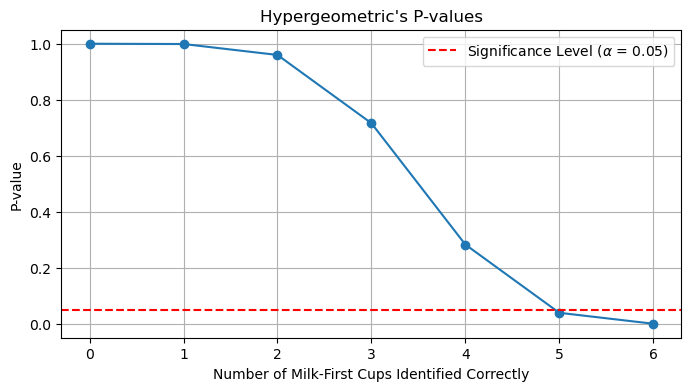

In [34]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(success_counts, p_values, marker='o')
ax.axhline(y=alpha, color='r', linestyle='--', label="Significance Level ($\\alpha$ = 0.05)")
ax.set_xlabel('Number of Milk-First Cups Identified Correctly')
ax.set_ylabel('P-value')
ax.set_title("Hypergeometric's P-values")
ax.set_xticks(success_counts)
ax.legend()
ax.grid()
plt.show()

The results are now clear: as the number of correctly chosen cups increases, the p-value decreases. This trend provides increasingly strong evidence against the null hypothesis. Remarkably,  even if she is permitted one mistake, selecting five out of six cups correctly still allows for a rejection of the null hypothesis, further supporting the argument for her exceptional ability. When she selects all six cups correctly, the evidence becomes even more compelling, solidifying the conclusion that her skill is significant and not attributable to random chance.

### References <a class="anchor" id="references"></a>

**$^1$** Zoltan Dienes (2008). "*Understanding Psychology as a Science, An introduction to scientific and statistical inference*". Palgrave Macmillan.

**$^2$** Learn Statistics Easily (2023). "*The Statistical Significance of the ‘Lady Tasting Tea’ Experiment*". [Learn Statistics Easily](https://statisticseasily.com/lady-tasting-tea/)

**$^3$** Fisher R. A. (1935). "*The Design of Experiments*". Chapter II: *The principles of experimentation illustrated by a psycho-physical experiment*, p.13 .Oliver and Boyd

**$^4$** Python Documentation (n.d.). "*math — Mathematical functions*". [Python Documentation](https://docs.python.org/3/library/math.html)


**$^5$**  Python Documentation (n.d.). "*itertools — Functions creating iterators for efficient looping*" [Python Documentation](https://docs.python.org/3/library/itertools.html).
 
**$^6$**  Python Documentation (n.d.). "*random — Generate pseudo-random numbers*". [Python Documentation](https://docs.python.org/3/library/random.html).

**$^7$**  Numpy (n.d.). "*NumPy reference*". [Numpy](https://numpy.org/doc/stable/reference/index.html#reference).

**$^8$**  Matplotlib (n.d.). "*Using Matplotlib*". [Matplotlib](https://matplotlib.org/stable/users/index.html).

**$^9$** Scipy, [n.d.]. "Statistical functions (scipy.stats)". [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)


**$^9$** Hayes A., Zhi V. H., Tarigan C. (n.d.). "*Combinatorics*. [Brilliant](https://brilliant.org/wiki/combinatorics/#permutations-and-combinations)

**$^{10}$** Frost J. (n.d.). "*Using Permutations to Calculate Probabilities*". [Statistics By Jim](https://statisticsbyjim.com/probability/permutations-probabilities/#:~:text=Permutations%20in%20probability%20theory%20and,order%20of%20numbers%20is%20crucial.)

**$^{11}$** Greeks for greeks (n.d). "*Circular Permutation*". [Greeks for greeks](https://www.geeksforgeeks.org/circular-permutation/)

**$^{12}$** Taylor S. (n.d.). "*Permutation*". [Corporate Finance Institute](https://corporatefinanceinstitute.com/resources/data-science/permutation/)

**$^{13}$** Library and Learning Center (n.d.). "*Statistics*". [Library and Learning Center](https://libraryguides.centennialcollege.ca/c.php?g=717168&p=5128089)

**$^{14}$** Greeks for greeks (2020). "*Python – math.comb() method*". [Greeks for greeks](https://www.geeksforgeeks.org/python-math-comb-method/)

**$^{15}$** Greeks for greeks (2024). "*Factorial in Maths*". [Greeks for greeks](https://www.geeksforgeeks.org/factorial/)

**$^{16}$** LabEx (n.d). "*How to use itertools.combinations in Python?*". [LabEx](https://labex.io/tutorials/python-how-to-use-itertools-combinations-in-python-398083)

**$^{17}$** Stackoverflow (2011). "*Python returning <itertools.combinations object at 0x10049b470> - How can I access this?*". [Stackoverflow](https://stackoverflow.com/questions/5176232/python-returning-itertools-combinations-object-at-0x10049b470-how-can-i-ac)

**$^{18}$** Hayes A., (2024). "*Simple Random Sampling: 6 Basic Steps With Examples*".[Investopedia](https://www.investopedia.com/terms/s/simple-random-sample.asp)

**$^{19}$** Python Documentation (n.d.). "*random — Generate pseudo-random numbers*". [Python Documentation](https://docs.python.org/3/library/random.html#random.sample)

**$^{20}$** Richardson J. T. E. (2021). "*Closer Look at the Lady Tasting Tea*". [Significance](https://doi.org/10.1111/1740-9713.01572), Volume 18, Pages 34–37.

**$^{21}$** Greeks for greeks (2024). "*How to count the frequency of unique values in NumPy array?*". [Greeks for greeks](https://www.geeksforgeeks.org/how-to-count-the-frequency-of-unique-values-in-numpy-array/)

**$^{22}$** Natarajan S. (2021). "*The Ultimate Guide to Hypothesis Testing for beginners*". [Medium](https://medium.com/analytics-vidhya/hypothesis-testing-a-simple-guide-fd08454d55f0)

**$^{23}$** Amanatullah (2023). "*A Comprehensive Guide to Hypothesis Testing: Understanding, Methods, and Applications*". [Medium](https://medium.com/@amanatulla1606/a-comprehensive-guide-to-hypothesis-testing-understanding-methods-and-applications-5e20dffce791)

**$^{24}$** Volchok E. (2020). "*Clear-Sighted Statistics: Module 13: Introduction to Null Hypothesis Significance Testing (NHST)*". [CUNY Queensborough Community College](https://academicworks.cuny.edu/cgi/viewcontent.cgi?article=1111&context=qb_oers#:~:text=The%20null%20hypothesis%20is%20a,process%20of%20nullification%20or%20falsification.&text=In%201925%2C%20the%20British%20statistician,Statistical%20Methods%20for%20Research%20Workers.)

**$^{25}$** Hora S. (2021). "*Understanding Hypothesis Testing*". [Towards Data Science](https://towardsdatascience.com/understanding-hypothesis-testing-65f9b3e9ab1f)

**$^{26}$** Verma N. (2023). "*One-tailed and Two-tailed Tests*". [Medium](https://medium.com/@nandiniverma78988/one-tailed-and-two-tailed-tests-df08e3721cfc) 

**$^{27}$** Modirshanechi A. (2020). "*Lady tasting tea: A Bayesian approach*". [Towards Data Science](https://towardsdatascience.com/lady-tasting-tea-a-bayesian-approach-1b0b94ca1530)

**$^{28}$** Beers B. (2024). "*P-Value: What It Is, How to Calculate It, and Examples*". [Investopedia](https://www.investopedia.com/terms/p/p-value.asp#:~:text=A%20p%2Dvalue%20measures%20the,is%20generally%20considered%20statistically%20significant.)

**$^{29}$** Srivastava A. (2017). "*Types of Statistical Tests
*". [Medium](https://medium.com/@anushka.da3/types-of-statistical-tests-b8ceb90e13b3)

**$^{30}$** Turney S. (2022). "*Probability Distribution | Formula, Types, & Examples*". [Scribbr](https://www.scribbr.com/statistics/probability-distributions/#:~:text=A%20probability%20distribution%20is%20an,by%20its%20probability%20of%20occurrence)

**$^{31}$** Wroughton J., Cole T. (2013). "*Distinguishing Between Binomial, Hypergeometric and NegativeBinomial Distributions*". [Journal of Statistics Education, Volume 21, Number 1](https://jse.amstat.org/v21n1/wroughton.pdf)

**$^{32}$** Lenail A. (2017). "*Understanding and Implementing the hypergeometric test in python*". [Medium](https://alexlenail.medium.com/understanding-and-implementing-the-hypergeometric-test-in-python-a7db688a7458)

## Task 2: **Numpy's Normal Distribution**


### Table of Contents
1. [Problem Statement](#task2-1)

### 1. Problem Statement <a class="anchor" id="task2-1"></a>

> In this task you will assess whether `numpy.random.normal()` properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.
>
> Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution. Explain the results and output.
>
> Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

### 1. The Origins of the Normal Distribution

The concept of the **normal distribution** has its roots in the pioneering work of **Abraham de Moivre** (1667–1754), a *prominent statistician of the 18th century* who made significant contributions to probability theory, especially through his analysis of repeated, independent events in gambling, such as coin flips. De Moivre discovered that as the number of trials in these experiments increased, the shape of the binomial distribution of outcomes began to resemble a smooth, symmetric, bell-shaped curve. *This curve*, which later became known as the normal distribution, allowed him to **approximate binomial probabilities with a continuous function**, simplifying the calculation of probabilities for large numbers of events. *In 1733*, de Moivre first published his findings in Latin, introducing what is now recognized as the **central limit theorem**. He later translated this work into English in his book, **The Doctrine of Chances** (1738). De Moivre's insights laid the groundwork for future statisticians like **Pierre-Simon Laplace**, who applied the normal curve to the *analysis of measurement errors*, noting that random fluctuations often followed this bell-shaped pattern. Building on these foundations, **Carl Friedrich Gauss** further developed the normal distribution, especially in his studies of *astronomical data*, where observed measurements tended to cluster around true values with random deviations. *Due to Gauss's substantial contributions*, the normal distribution is also referred to as the **Gaussian distribution** **$^1$**.

### 2. Normal Distribution

The normal distribution is a continuous probability distribution that is symmetric about its mean. This means that it describes the probabilities of a continuous random variable, where values can take on any real number within a given range. The symmetry of the normal distribution indicates that data points close to the mean occur more frequently than those farther away. In this distribution, the mean (average), median (middle value), and mode (most frequent value) are all identical and located at the center, resulting in the characteristic "bell curve" shape when graphed. This model describes how the values of a variable are likely to be distributed, making the normal distribution a fundamental concept in statistics. It is especially significant because it accurately represents a wide range of natural phenomena, from biological measurements to social science data. Moreover, it serves as the foundation for many statistical methods and analyses, including hypothesis testing and confidence intervals, due to the central limit theorem, which states that the sum of a large number of independent random variables will tend to follow a normal distribution, regardless of the original distribution of the variables.

The normal distribution is characterized by two key parameters: 
- the mean ($\mu$): It represents the central tendency or average of the distribution, indicating where the highest point of the curve lies
- the standard deviation ($\sigma$): the standard deviation measures the spread or dispersion of the data around the mean, with larger values indicating a wider distribution and smaller values indicating a more concentrated distribution **$^2$**.

To gain a deeper understanding of how data is distributed in a normal distribution, we can apply the Empirical Rule, commonly referred to as the 68-95-99.7 rule or the three-sigma rule. This principle is based on the observation that nearly all data points in a normal distribution lie within three standard deviations from the mean. Specifically, the rule indicates that:

- approximately $68%$ of the data falls within one standard deviation ($\pm 1\sigma$) of the mean,
- about $95%$ of the data falls within two standard deviations ($\pm 2\sigma$) 
- and nearly $99.7%$ of the data lies within three standard deviations ($\pm 3\sigma$).

By using this rule, we can quickly assess the spread and variability of the data, allowing us to make inferences about the likelihood of data points falling within specific ranges **$^3$**.   


### 3. Python code

Having gained a clearer understanding of the normal distribution, we can now proceed to generate some normal values and examine whether they conform to the characteristics of a normal distribution. To achieve this, we will use the `random.normal()` from the NumPy library. According to the NumPy documentation, this function generates samples from a normal  distribution, which is specified by a mean (loc) and a standard deviation (scale). By generating these random values, we can analyze their distribution and assess whether they align with the theoretical properties of a normal distribution, such as symmetry, the bell-shaped curve, and the empirical rule **$^4$**.

In [4]:
# define Mean and Standard Deviation
mu = 10.0
sigma = 3.0
sample_size = 100000

random_sample = np.random.normal(loc=mu, scale=sigma, size=sample_size)

print(f"Generated a sample of {sample_size} values with mean {mu} and standard deviation {sigma}.")
print(f"The Random Values are:\n {random_sample}")

Generated a sample of 100000 values with mean 10.0 and standard deviation 3.0.
The Random Values are:
 [13.17719831  3.01949213 16.02721462 ...  8.70641805 11.10836329
  8.32292038]


let's visualize the result in an histogram

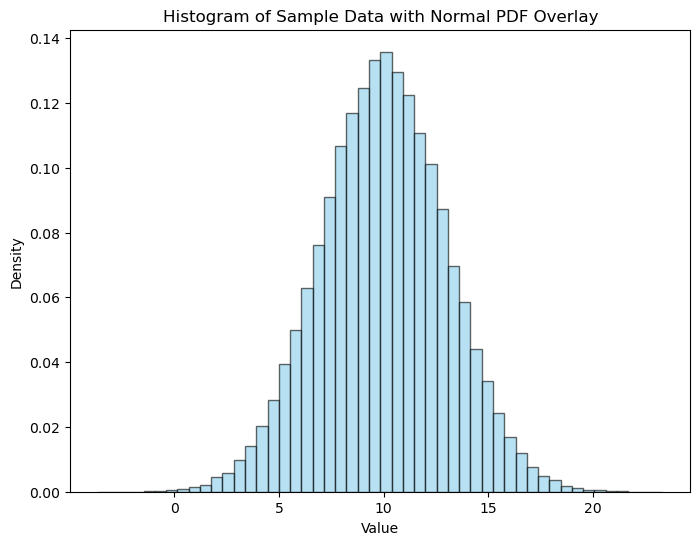

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(random_sample, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black')
ax.set_title("Histogram of Sample Data with Normal PDF Overlay")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
plt.show()


#### 3.1 Probability Density Function (PDF)

Having generated a set of normally distributed values, we now turn our attention to the Probability Density Function (PDF), a fundamental concept that describes the likelihood of a continuous random variable taking on a specific value. For the normal distribution, the PDF is characterized by its bell-shaped curve, which encapsulates the central tendencies of the data. Mathematically, the PDF of a normal distribution is expressed using the following formula:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

Where:
- $\mu$ is the mean of the distribution;
- $\sigma$ is the standard deviation;
- $\sigma^2$ is the variance. It quantifies how much the values in a distribution deviate from the mean.
- $e$ is Euler's number, approximately equal to 2.71828 **$^5$**.

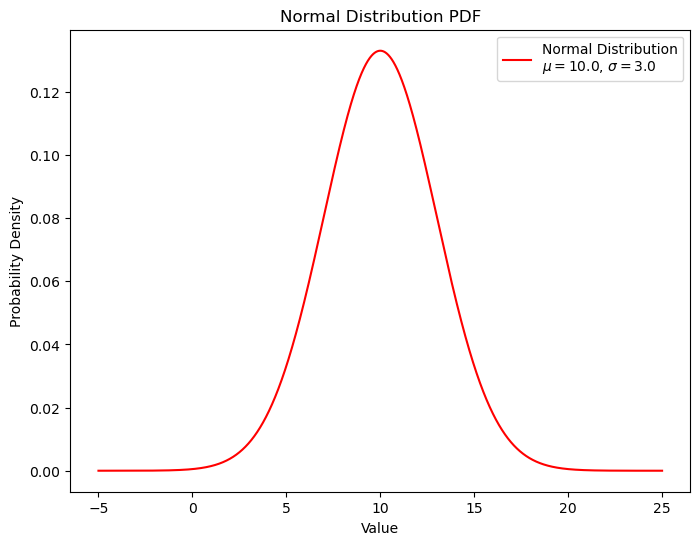

In [26]:
def normal_pdf(x, mu, sigma):
    return (1 / (math.sqrt(2 * math.pi) * sigma)) * math.exp(-0.5 * ((x - mu) / sigma) ** 2)


# Generate a range of x values
x_values = np.linspace(-5, 25, 100001)

# Calculate the PDF for each x value
pdf_values = [normal_pdf(x, mu, sigma) for x in x_values]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_values, pdf_values, color='r', label=f'Normal Distribution\n$\mu={mu}$, $\sigma={sigma}$')
ax.set_xlabel('Value')
ax.set_ylabel('Probability Density')
ax.set_title('Normal Distribution PDF')
ax.legend()
plt.show()

now we can overlay the PDF with our histogram.

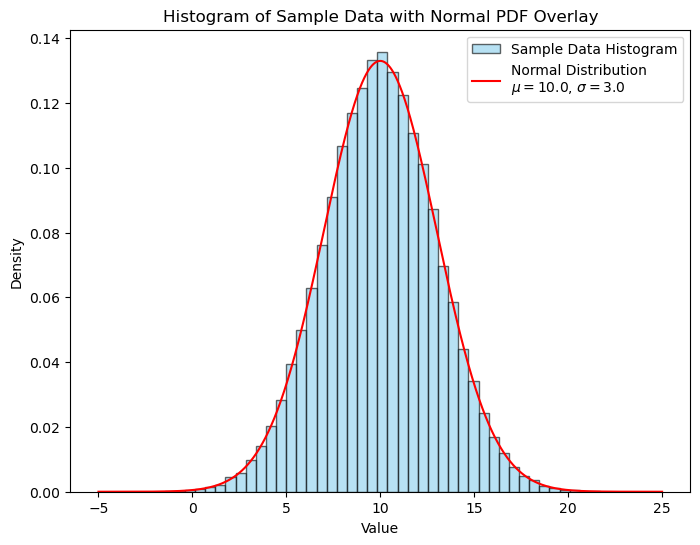

In [32]:
# Plot both the histogram and PDF
fig, ax = plt.subplots(figsize=(8, 6))
# Histogram of the sample data
ax.hist(random_sample, bins=50, density=True, alpha=0.6, color='skyblue',  edgecolor='black',  label='Sample Data Histogram')
# PDF line plot
ax.plot(x_values, pdf_values, color='r', label=f'Normal Distribution\n$\mu={mu}$, $\sigma={sigma}$')
ax.set_title("Histogram of Sample Data with Normal PDF Overlay")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.legend()
plt.show()


### References

**$^1$** Lane D. (2022). "*7.2: History of the Normal Distribution*". [LibreTexts Statistics](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Introductory_Statistics_%28Lane%29/07%3A_Normal_Distribution/7.02%3A_History_of_the_Normal_Distribution)

**$^2$** Chen J. (2024). "*Normal Distribution: What It Is, Uses, and Formula*". [investopedia](https://www.investopedia.com/terms/n/normaldistribution.asp#:~:text=Error%20Code%3A%20100013)

**$^3$** Frost J. (n.d.). "*Empirical Rule: Definition & Formula*". [Statistics by Jim](https://statisticsbyjim.com/probability/empirical-rule/)

**$^4$** Numpy Documentation (n.d.). "*numpy.random.normal*". [Numpy](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html)

**$^5$** Medium (2020). "*Normal Distribution: Probability Density Function Derivation*". [Medium](https://medium.com/@curiousincosmos/normal-distribution-probability-density-function-derivation-872c4f9d514d)

## Task 3: **t-Test Calculation**


### Table of Contents
1. [Problem Statement](#task3-1)

### 1. Problem Statement <a class="anchor" id="task3-1"></a>

> Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.
>
> | Patient ID | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
> | -----------| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
> | Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
> | After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |
>
> Calculate the t-statistic based on this data set, using Python. Compare it to the value given by `scipy.stats`. Explain your work and list any sources used.


### References

## Task 4: **ANOVA**


### Table of Contents
1. [Problem Statement](#task4-1)

### 1. Problem Statement <a class="anchor" id="task4-1"></a>

>In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called `no_type_ii` and set it to `0`.
>
>Now use a loop to perform the following test 10,000 times.
>
>1. Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean >of `5.0`, and the third a mean of `5.1`.
>2. Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a type II error occurs.
>
>Summarize and explain your results.

### References

***
End